# Deep Learning
## HW2 - Problem 2

Full Name: Hossein Pirhosseinloo

Student Number: 400301834

In [239]:
import torch
import torch.nn as nn
from torchvision.transforms import ToTensor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [240]:
# Alef
matches = pd.read_csv('./data/HW2_data/international_matches.csv', sep=',')
matches.tail(10)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23911,2022-06-14,Ukraine,Republic of Ireland,Europe,Europe,27,47,1535,1449,1,...,No,Draw,75.0,75.0,74.8,78.7,80.0,76.5,72.7,73.8
23912,2022-06-14,Bosnia and Herzegovina,Finland,Europe,Europe,59,57,1388,1406,3,...,No,Win,76.0,83.0,74.2,77.0,78.0,70.0,72.3,73.5
23913,2022-06-14,Romania,Montenegro,Europe,Europe,48,70,1446,1342,0,...,No,Lose,77.0,65.0,73.5,73.7,75.0,76.2,74.7,68.2
23914,2022-06-14,Luxembourg,Faroe Islands,Europe,Europe,94,124,1229,1137,2,...,No,Draw,69.0,NaN,68.5,NaN,69.8,NaN,NaN,NaN
23915,2022-06-14,Turkey,Lithuania,Europe,Europe,43,138,1461,1092,2,...,No,Win,79.0,71.0,78.2,76.7,78.2,NaN,NaN,NaN
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


Text(0, 0.5, 'away_team_rank')

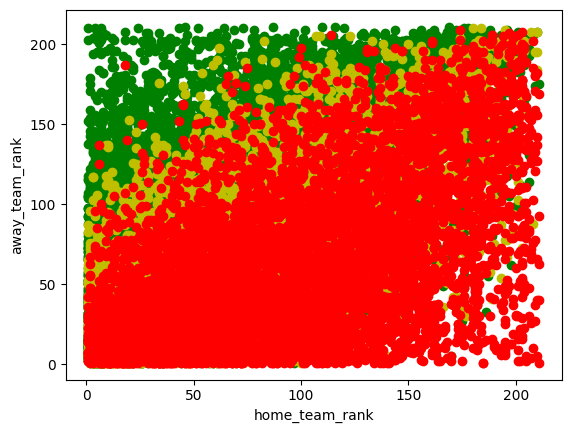

In [241]:
# Be
win_home = []
win_away = []
draw_home = []
draw_away = []
lose_home = []
lose_away = []
for i in matches.index:
    if(matches["home_team_result"][i] == "Win"):
        win_home.append(matches["home_team_fifa_rank"][i])
        win_away.append(matches["away_team_fifa_rank"][i])
    elif(matches["home_team_result"][i] == "Draw"):
        draw_home.append(matches["home_team_fifa_rank"][i])
        draw_away.append(matches["away_team_fifa_rank"][i])
    elif(matches["home_team_result"][i] == "Lose"):
        lose_home.append(matches["home_team_fifa_rank"][i])
        lose_away.append(matches["away_team_fifa_rank"][i])

# plot scatter diagrams for win, draw, lose
plt.scatter(win_home, win_away, c="g")
plt.scatter(draw_home, draw_away, c="y")
plt.scatter(lose_home, lose_away, c="r")
plt.xlabel("home_team_rank")
plt.ylabel("away_team_rank")

In [242]:
# Jim
# drop items with zero fifa points 

i = matches[(matches.home_team_total_fifa_points == 0) & ( matches.away_team_total_fifa_points == 0)].index
matches = matches.drop(i)

# split remained data
matches_np = np.array(matches[["home_team_total_fifa_points", "away_team_total_fifa_points", "home_team_fifa_rank", "away_team_fifa_rank", "home_team_result"]])
np.random.shuffle(matches_np)
train = matches_np[:int(len(matches_np)*0.75)]
train_x=np.array([train[x][:-1] for x in range(0,len(train))])
train_y=np.array([train[x][4] for x in range(0,len(train))])
# replacing result column with numbers
train_y[train_y == 'Lose'] = 0
train_y[train_y == 'Win'] = 1
train_y[train_y == 'Draw'] = 2
test = matches_np[int(len(matches_np)*0.75):]
test_x=np.array([test[x][:-1] for x in range(0,len(test))])
test_y=np.array([test[x][4] for x in range(0,len(test))])
test_y[test_y == 'Lose'] = 0
test_y[test_y == 'Win'] = 1
test_y[test_y == 'Draw'] = 2

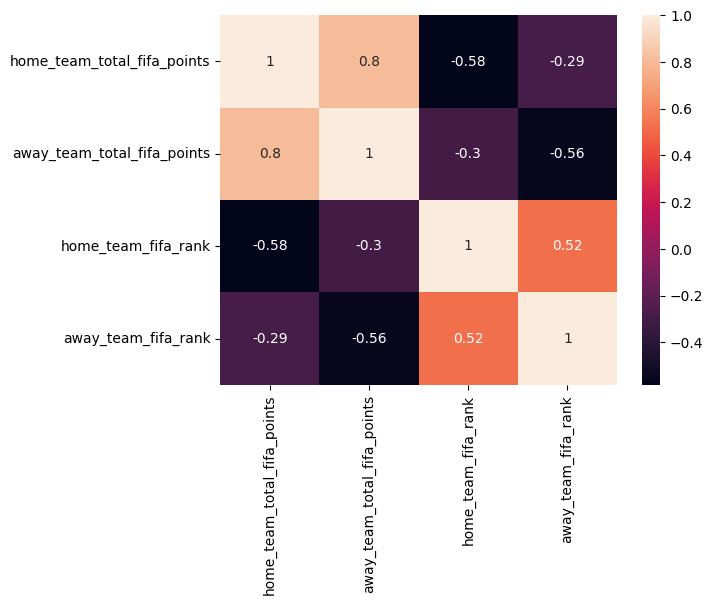

In [243]:
# D
# correlation heatmap
dataplot = sns.heatmap(matches[["home_team_total_fifa_points", "away_team_total_fifa_points", "home_team_fifa_rank", "away_team_fifa_rank"]].corr(), annot=True)
plt.show()

In [244]:
# He
# mlp with 3 hidden layers on cpu
device = "cpu"
input_dim=4
h1_dim=10
h2_dim=20
h3_dim=8
output_dim=3

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_dim, h1_dim),
            nn.ReLU(),
            nn.Linear(h1_dim, h2_dim),
            nn.ReLU(),
            nn.Linear(h2_dim, h3_dim),
            nn.ReLU(),
            nn.Linear(h3_dim, output_dim)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
model = NeuralNetwork().to(device)

In [245]:
def train_loop(x, y, batchsize, model, loss_fn, optimizer):
    size = len(y)
    step = int(size/batchsize)
    for i in range(step):
        # Compute prediction and loss
        pred = model(x[i*batchsize:((i+1)*batchsize)])
        loss = loss_fn(pred.type(torch.float), y[i*batchsize:((i+1)*batchsize)])

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
def test_loop(x, y, model, loss_fn):
    size = len(y)
    test_loss, correct = 0, 0
    # apply nn to all data without batching
    with torch.no_grad():
        pred = model(x)
        test_loss += loss_fn(pred.type(torch.float), y).item()
        correct += torch.sum(torch.argmax(pred, dim=1) == y).type(torch.float)
    correct /= size
    print(f"Test Error: Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f}")

In [246]:
learning_rate = 1e-3
epochs = 5
batchsize = 64
train_x = torch.from_numpy(np.array(train_x, dtype='int32')).type(torch.float).requires_grad_()
train_y = torch.from_numpy(np.array(train_y, dtype='int32')).type(torch.int64)
test_x = torch.from_numpy(np.array(test_x, dtype='int32')).type(torch.float).requires_grad_()
test_y = torch.from_numpy(np.array(test_y, dtype='int32')).type(torch.int64)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_x, train_y, batchsize, model, loss_fn, optimizer)
    test_loop(test_x, test_y, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
Test Error: Accuracy: 53.3%, Avg loss: 0.974332
Epoch 2
-------------------------------
Test Error: Accuracy: 54.2%, Avg loss: 0.957000
Epoch 3
-------------------------------
Test Error: Accuracy: 55.7%, Avg loss: 0.947523
Epoch 4
-------------------------------
Test Error: Accuracy: 56.1%, Avg loss: 0.941498
Epoch 5
-------------------------------
Test Error: Accuracy: 56.6%, Avg loss: 0.937357
Done!


همانطور که مشاهده می شود این شبکه کم عمق در این تست به 56 درصد دفت دست پیدا کرده است. 

برای افزایش دقت می توان با تغییر دادن هایپرپارامترها نتایجه را بررسی کرد.

همچنین می توان تعداد لایه ها یا پیچیدگی شبکه را اضافه کرد.